In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

from pandas_datareader import data
from scipy.optimize import minimize

# Important notes

### There are things that need to be input manually.
<br> - Weights for each category 
<br> - Reading the right CSVs
<br> - Results read df and prints


### Agressive 100/00
#### 100% Stocks | 0% Bonds
<br> 30% Technology 
<br> 20% Healthcare
<br> 20% Real Estate
<br> 15% Industrial
<br> 15% Consumer Cyclical


### Weights for each category

In [8]:
w_bonds = 0
w_tech = 0.3*1
w_healthcare = 0.2*1
w_realestate = 0.2*1
w_industrial = 0.15*1
w_consumercyc = 0.15*1

categories = ['Technology', 'Healthcare', 'Real Estate', 'Industrial', 'Consumer Cyclical', 'Bonds']
cal_weights = [w_tech, w_healthcare, w_realestate, w_industrial, w_consumercyc, w_bonds]

In [9]:
for n in range(len(categories)):
    print(f'Complete {categories[n]} weights: ', cal_weights[n])

Complete Technology weights:  0.3
Complete Healthcare weights:  0.2
Complete Real Estate weights:  0.2
Complete Industrial weights:  0.15
Complete Consumer Cyclical weights:  0.15
Complete Bonds weights:  0


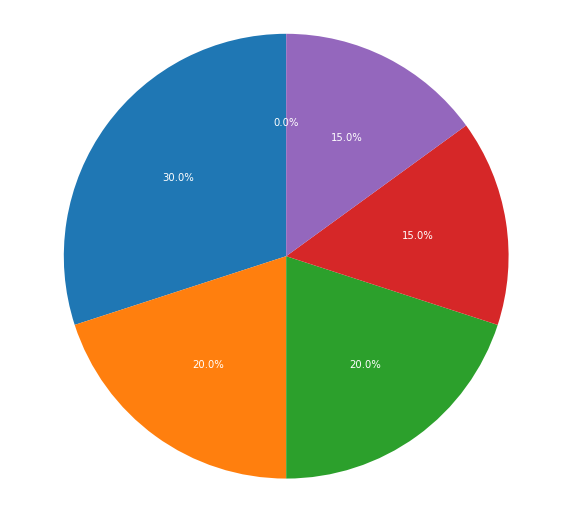

In [10]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = categories
sizes = cal_weights
explode = (0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'color':"w"})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Example for minimization function:
### 10 000$ to be invested
### Required Rate of Return 35%, minimum variance

### RR for each category (Only Use as comparative to make sure we meet the requirements)

In [11]:
amount_to_invest = 10000

rr_bonds = w_bonds * 0.35
rr_tech = w_tech * 0.35
rr_healthcare = w_healthcare * 0.35
rr_realestate = w_realestate * 0.35
rr_industrial = w_industrial * 0.35
rr_consumercyc = w_consumercyc * 0.35

# Read the the right CSVs

In [12]:
cons_cyc = pd.read_csv('selected_stocks_consumer_c.csv')
healthcare = pd.read_csv('selected_stocks_healthcare.csv')
industrial = pd.read_csv('selected_stocks_industrials.csv')
realestate = pd.read_csv('selected_stocks_realestate.csv')
tech = pd.read_csv('selected_stocks_tech.csv')


adjClose_5y = pd.read_csv('../Cleaned_CloseP_5y.csv', index_col='Date')
close_5y = pd.read_csv('../Cleaned_CloseP_5y.csv', index_col='Date')

In [13]:
T_bill_return = quandl.get('USTREASURY/YIELD')['5 YR'][-1]/100

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----

## Building function: Test on Technology

In [8]:
# tech

In [9]:
# n = len(adjClose_5y[tech['ticker']].columns)
# log_returns_tech = np.log(adjClose_5y[tech['ticker']] / adjClose_5y[tech['ticker']].shift(1)).dropna() # Same as 1 + stocks_data.pct_change()
# log_returns_tech

In [10]:
# def calculate_vol(weights):
#     annualized_cov = np.dot(log_returns_tech.cov()*252,weights)
#     vol = np.dot(weights.transpose(),annualized_cov)
#     return np.sqrt(vol)
    
# def calculate_returns(weights, log_returns):
#     # Annual log Returns

#     return np.sum(log_returns.mean()*weights) * 252

# def function_to_minimize(weights):

#     # minimize a -1 * SR (that's how the math works here, but it is the same as maximizing SR)
#     return -1 * ((calculate_returns(weights, log_returns_tech) - T_bill_return )/calculate_vol(weights)) 

In [11]:
# bounds = tuple((0,1) for n in range(n))
# constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1})
# equal_weights = n * [1/n] 

In [12]:
# results = minimize(fun=function_to_minimize,
#         x0=equal_weights,
#         bounds=bounds,
#         constraints=constraints)

# results

In [13]:
# # results['x']
# portfolio = {}
# p = 0
# for i in results['x']:
#     print('Put',(i*100).round(3), "% in", log_returns_tech.columns[p])

#     portfolio[log_returns_tech.columns[p]] = (i).round(5)
#     p += 1

In [14]:
# tech_portfolio_w = {}
# for b in portfolio:
#     if portfolio[b] != 0:
#         tech_portfolio_w[b] = portfolio[b]
# tech_portfolio_w

In [15]:
# tech_pf_returns = {}
# for b in tech_portfolio_w.keys():
#     tech_pf_returns[b] = tech[tech['ticker'] == b].iloc[0]['annu_return_5y'].round(5)

# tech_sum_return = sum(tech_portfolio_w[k]*tech_pf_returns[k] for k in tech_portfolio_w)
# tech_weighted_return = w_tech * tech_sum_return


# tech_pf_vol = {}
# for n in tech_portfolio_w.keys():
#     tech_pf_vol[n] = tech[tech['ticker'] == n].iloc[0]['AHV_5y'].round(5)

# tech_sum_var = sum(tech_portfolio_w[k]*tech_pf_vol[k] for k in tech_portfolio_w)
# tech_weighted_volatility = w_tech * tech_sum_var

In [16]:
# print(f"Tech portfolio weights: ", tech_portfolio_w)
# print(f"Tech portfolio returns: ", tech_sum_return)
# print(f"Tech portfolio weighted returns: ", tech_weighted_return)
# print(f"Tech portfolio volatility: ", tech_sum_var)
# print(f"Tech portfolio weighted volatility: ", tech_weighted_volatility)

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----

# Final Function

In [14]:
def sharpe_ratio_min(sector_df, sector_weight, sector_name):
    
    n = len(adjClose_5y[sector_df['ticker']].columns)
    log_ret = np.log(adjClose_5y[sector_df['ticker']] / adjClose_5y[sector_df['ticker']].shift(1)).dropna()

    
    def calculate_vol(weights):
        annualized_cov = np.dot(log_ret.cov()*252,weights)
        vol = np.dot(weights.transpose(),annualized_cov)
        return np.sqrt(vol)
    
    def calculate_returns(weights, log_returns):
        # Annual log Returns

        return np.sum(log_returns.mean()*weights) * 252

    def function_to_minimize(weights):

        # minimize a -1 * SR (that's how the math works here, but it is the same as maximizing SR)
        return -1 * ((calculate_returns(weights, log_ret) - T_bill_return )/calculate_vol(weights)) 


    bounds = tuple((0,1) for n in range(n))
    constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1})
    equal_weights = n * [1/n] 

    results = minimize(fun=function_to_minimize,
        x0=equal_weights,
        bounds=bounds,
        constraints=constraints)
    

    portfolio = {}
    p = 0
    for i in results['x']:
        portfolio[log_ret.columns[p]] = (i).round(5)
        p += 1

    final_portfolio = {}
    for b in portfolio:
        if portfolio[b] != 0:
            final_portfolio[b] = portfolio[b] * sector_weight

    
    pf_returns = {}
    for b in final_portfolio.keys():
        pf_returns[b] = (sector_df[sector_df['ticker'] == b].iloc[0]['annu_return_5y'].round(5))

        pf_returns[b] = pf_returns[b] * final_portfolio[b]


    pf_vol = {}
    for n in final_portfolio.keys():
        pf_vol[n] = (sector_df[sector_df['ticker'] == n].iloc[0]['AHV_5y'].round(5))

        pf_vol[n] = pf_vol[n] * final_portfolio[n]

    pf_sector = {}
    for n in final_portfolio.keys():
        pf_sector[n] = sector_name

    return final_portfolio, pf_returns, pf_vol, results['success'], sector_name, pf_sector

# Technology results

In [15]:
tech_results = sharpe_ratio_min(tech, w_tech, 'Technology')

print("Success: ", tech_results[3])
print("Sector: ", tech_results[4])
print("Technology portfolio weights: ", tech_results[0])
print("Technology portfolio weighted returns: ", tech_results[1])
print("Technology portfolio weighted volatility: ", tech_results[2])


Success:  True
Sector:  Technology
Technology portfolio weights:  {'MGIC': 0.07063499999999999, 'NSIT': 0.058251, 'ON': 0.007925999999999999, 'TTD': 0.163185}
Technology portfolio weighted returns:  {'MGIC': 0.016082176799999997, 'NSIT': 0.01288803375, 'ON': 0.0027248002799999996, 'TTD': 0.1560179148}
Technology portfolio weighted volatility:  {'MGIC': 0.023599153499999997, 'NSIT': 0.0213722919, 'ON': 0.004023713159999999, 'TTD': 0.11151899715000001}


# Healthcare Results


In [16]:
healthcare_results = sharpe_ratio_min(healthcare, w_healthcare, 'Healthcare')

print("Success: ", healthcare_results[3])
print("Sector: ", healthcare_results[4])
print("Healthcare portfolio weights: ", healthcare_results[0])
print("Healthcare portfolio weighted returns: ", healthcare_results[1])
print("Healthcare portfolio weighted volatility: ", healthcare_results[2])

Success:  True
Sector:  Healthcare
Healthcare portfolio weights:  {'IDXX': 0.048494, 'BDSI': 0.008194, 'CDMO': 0.018976000000000003, 'ICLR': 0.017402, 'MEDP': 0.006024000000000001, 'OPRX': 0.043926, 'RGEN': 0.047034, 'TNDM': 0.000492, 'XOMA': 0.009460000000000001}
Healthcare portfolio weighted returns:  {'IDXX': 0.01412290762, 'BDSI': 0.00202088622, 'CDMO': 0.012422069120000002, 'ICLR': 0.00388186414, 'MEDP': 0.0020785812000000004, 'OPRX': 0.03552207768, 'RGEN': 0.02108675322, 'TNDM': 0.00017397612, 'XOMA': 0.0035150522000000008}
Healthcare portfolio weighted volatility:  {'IDXX': 0.01479891398, 'BDSI': 0.00463690266, 'CDMO': 0.013060232000000003, 'ICLR': 0.00516769792, 'MEDP': 0.0030007351200000004, 'OPRX': 0.029825754000000003, 'RGEN': 0.01953369054, 'TNDM': 0.0003893688, 'XOMA': 0.006518696800000001}


# Real Estate results

In [17]:
realestate_results = sharpe_ratio_min(realestate, w_realestate, 'Real Estate')

print("Success: ", realestate_results[3])
print("Sector: ", realestate_results[4])
print("Real Estate portfolio weights: ", realestate_results[0])
print("Real Estate portfolio weighted returns: ", realestate_results[1])
print("Real Estate portfolio weighted volatility: ", realestate_results[2])

Success:  True
Sector:  Real Estate
Real Estate portfolio weights:  {'CBRE': 0.06436800000000001, 'SBAC': 0.135632}
Real Estate portfolio weighted returns:  {'CBRE': 0.015709654080000003, 'SBAC': 0.03218140464}
Real Estate portfolio weighted volatility:  {'CBRE': 0.022607328960000003, 'SBAC': 0.0362951232}


# Industrial results


In [18]:
industrial_results = sharpe_ratio_min(industrial, w_industrial, 'Industrial')

print("Success: ", industrial_results[3])
print("Sector: ", industrial_results[4])
print("Industrial portfolio weights: ", industrial_results[0])
print("Industrial portfolio weighted returns: ", industrial_results[1])
print("Industrial portfolio weighted volatility: ", industrial_results[2])

Success:  True
Sector:  Industrial
Industrial portfolio weights:  {'ODFL': 0.07812599999999999, 'GLDD': 0.0006705, 'HSON': 0.0079845, 'KRNT': 0.0082575, 'QRHC': 0.0064785, 'RCII': 0.0032175, 'SAIA': 0.00021749999999999997, 'SBLK': 0.0031214999999999997, 'TRNS': 0.0419265}
Industrial portfolio weighted returns:  {'ODFL': 0.029895695159999996, 'GLDD': 0.000149353875, 'HSON': 0.0013996030050000001, 'KRNT': 0.0032399126999999995, 'QRHC': 0.00158256798, 'RCII': 0.000946041525, 'SAIA': 8.666504999999999e-05, 'SBLK': 0.0008433980849999999, 'TRNS': 0.01917634257}
Industrial portfolio weighted volatility:  {'ODFL': 0.023282329259999995, 'GLDD': 0.00027295384499999997, 'HSON': 0.0037688436900000003, 'KRNT': 0.0042162795000000005, 'QRHC': 0.0045667594350000005, 'RCII': 0.0015455583, 'SAIA': 8.657152499999998e-05, 'SBLK': 0.0018238924499999999, 'TRNS': 0.01776928923}


# Consumer Cyclical resulsts

In [19]:
consumercyc_results = sharpe_ratio_min(cons_cyc, w_consumercyc, 'Consumer Cyclical')

print("Success: ", consumercyc_results[3])
print("Sector: ", consumercyc_results[4])
print("Consumer Cyclical portfolio weights: ", consumercyc_results[0])
print("Consumer Cyclical portfolio weighted returns: ", consumercyc_results[1])
print("Consumer Cyclical portfolio weighted volatility: ", consumercyc_results[2])

Success:  True
Sector:  Consumer Cyclical
Consumer Cyclical portfolio weights:  {'HLT': 0.0020174999999999998, 'TSLA': 0.04697249999999999, 'CHDN': 0.011786999999999999, 'CLAR': 0.031827, 'FIVE': 0.006205499999999999, 'FOXF': 0.0124335, 'LULU': 0.038754}
Consumer Cyclical portfolio weighted returns:  {'HLT': 0.00042337237499999995, 'TSLA': 0.03474039127499999, 'CHDN': 0.004216445639999999, 'CLAR': 0.009759431280000001, 'FIVE': 0.0020635149149999996, 'FOXF': 0.00457154928, 'LULU': 0.014001820199999999}
Consumer Cyclical portfolio weighted volatility:  {'HLT': 0.00063474585, 'TSLA': 0.028707713099999997, 'CHDN': 0.005053794119999999, 'CLAR': 0.01252487931, 'FIVE': 0.0028105950599999997, 'FOXF': 0.00575198577, 'LULU': 0.015224896439999998}


# Bonds Results

In [20]:
bonds_weights = {'Bonds' : w_bonds}
bonds_returns = {'Bonds' : w_bonds * T_bill_return}
bonds_volatility = {'Bonds': 0}
bonds_sector = {'Bonds': 'Bonds'}

print(f"Bonds portfolio weight: ", bonds_weights)
print(f"Bonds portfolio weighted returns: ", bonds_returns)
print(f"Bonds portfolio weighted volatility: ", bonds_volatility)

Bonds portfolio weight:  {'Bonds': 0}
Bonds portfolio weighted returns:  {'Bonds': 0.0}
Bonds portfolio weighted volatility:  {'Bonds': 0}


# Final results

In [21]:
complete_PF_weights = tech_results[0] | healthcare_results[0] | realestate_results[0] | industrial_results[0] | consumercyc_results[0] | bonds_weights
complete_PF_returns = tech_results[1] | healthcare_results[1] | realestate_results[1] | industrial_results[1] | consumercyc_results[1] | bonds_returns
complete_PF_volatility = tech_results[2] | healthcare_results[2] | realestate_results[2] | industrial_results[2] | consumercyc_results[2] | bonds_volatility
complete_PF_sectors = tech_results[5] | healthcare_results[5] | realestate_results[5] | industrial_results[5] | consumercyc_results[5] | bonds_sector

In [22]:
compelete_PF_DF = pd.DataFrame.from_dict(complete_PF_weights, orient='index')
compelete_PF_DF.rename(columns={0:'weights'}, inplace=True)
compelete_PF_DF['returns'] = compelete_PF_DF.index.map(complete_PF_returns)
compelete_PF_DF['volatility'] = compelete_PF_DF.index.map(complete_PF_volatility)
compelete_PF_DF['sectors'] = compelete_PF_DF.index.map(complete_PF_sectors)
compelete_PF_DF['Example: 10k'] = compelete_PF_DF['weights'] * amount_to_invest

In [23]:
sum_df = pd.DataFrame({'weights': [sum(compelete_PF_DF['weights'])],
                    'returns' : [sum(compelete_PF_DF['returns'])],
                    'volatility' : [sum(compelete_PF_DF['volatility'])],
                    'Example: 10k' : [sum(compelete_PF_DF['Example: 10k'])]})

sum_df

,weights,returns,volatility,Example: 10k
0,0.999996,0.457524,0.44439,9999.96


In [24]:
compelete_PF_DF

,weights,returns,volatility,sectors,Example: 10k
MGIC,0.070635,0.016082,0.023599,Technology,706.350
NSIT,0.058251,0.012888,0.021372,Technology,582.510
ON,0.007926,0.002725,0.004024,Technology,79.260
TTD,0.163185,0.156018,0.111519,Technology,1631.850
IDXX,0.048494,0.014123,0.014799,Healthcare,484.940
BDSI,0.008194,0.002021,0.004637,Healthcare,81.940
CDMO,0.018976,0.012422,0.013060,Healthcare,189.760
ICLR,0.017402,0.003882,0.005168,Healthcare,174.020
MEDP,0.006024,0.002079,0.003001,Healthcare,60.240
OPRX,0.043926,0.035522,0.029826,Healthcare,439.260


In [25]:
compelete_PF_DF.to_csv("Agressive_100_00_weights.csv")

# Ploting sandbox

In [26]:
all_label = list(compelete_PF_DF.sectors.unique())
labels = list(compelete_PF_DF.sectors.unique()[:-1])
print(all_label)
print(labels)

['Technology', 'Healthcare', 'Real Estate', 'Industrial', 'Consumer Cyclical', 'Bonds']
['Technology', 'Healthcare', 'Real Estate', 'Industrial', 'Consumer Cyclical']


In [27]:
sector_values = [[] for _ in range(len(labels))]
sector_values[0] = sorted(list(tech_results[0].values()))
sector_values[1] = sorted(list(healthcare_results[0].values()))
sector_values[2] = sorted(list(realestate_results[0].values()))
sector_values[3] = sorted(list(industrial_results[0].values()))
sector_values[4] = sorted(list(consumercyc_results[0].values()))

In [28]:
sector_tickers = [[] for _ in range(len(labels))]
sector_tickers[0] = sorted(list(tech_results[0].keys()))
sector_tickers[1] = sorted(list(healthcare_results[0].keys()))
sector_tickers[2] = sorted(list(realestate_results[0].keys()))
sector_tickers[3] = sorted(list(industrial_results[0].keys()))
sector_tickers[4] = sorted(list(consumercyc_results[0].keys()))

In [29]:
sector_full_weights = []
sector_full_weights.append(w_tech)
sector_full_weights.append(w_healthcare)
sector_full_weights.append(w_realestate)
sector_full_weights.append(w_industrial)
sector_full_weights.append(w_consumercyc)
sector_full_weights.append(w_bonds)

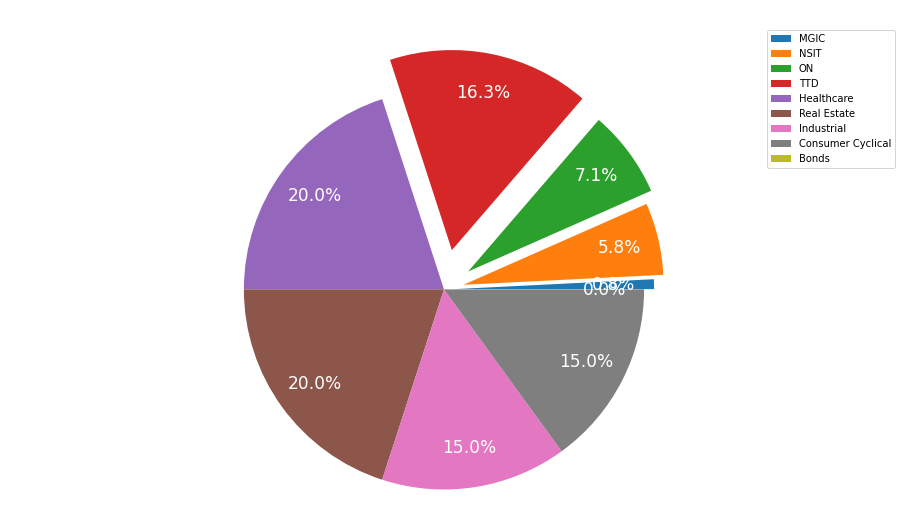

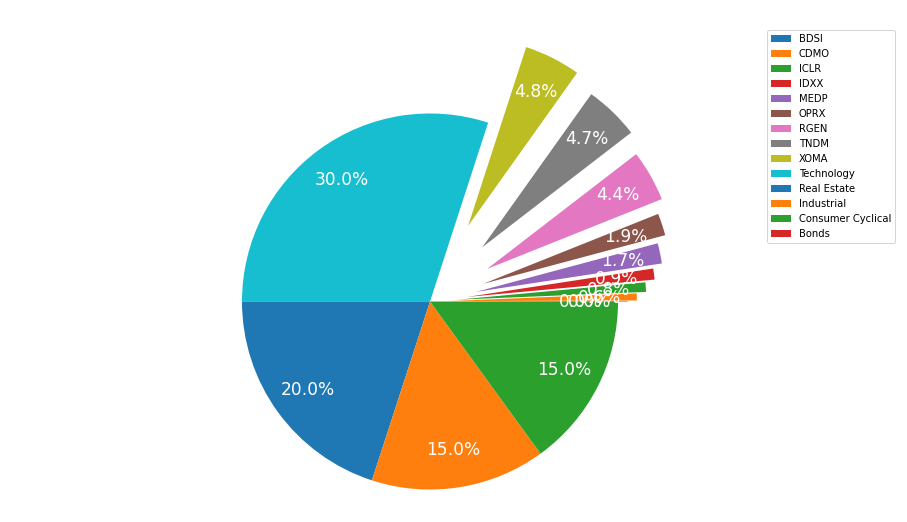

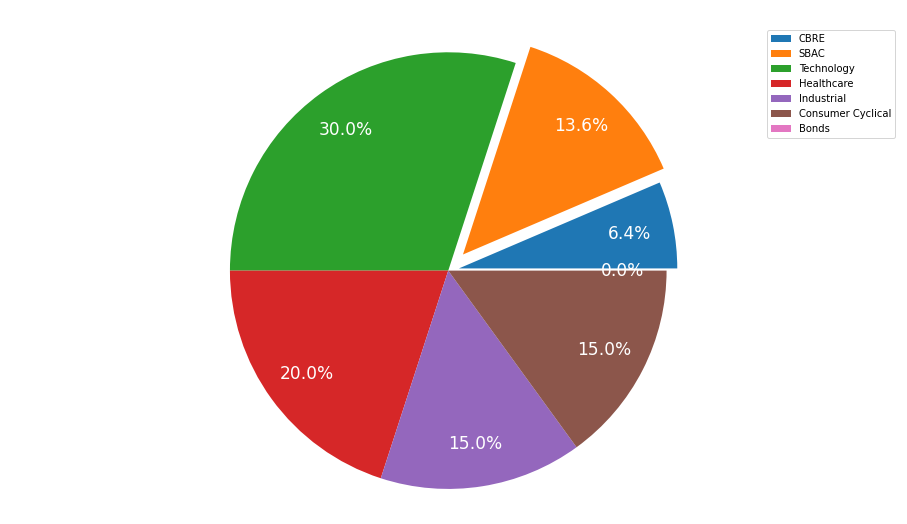

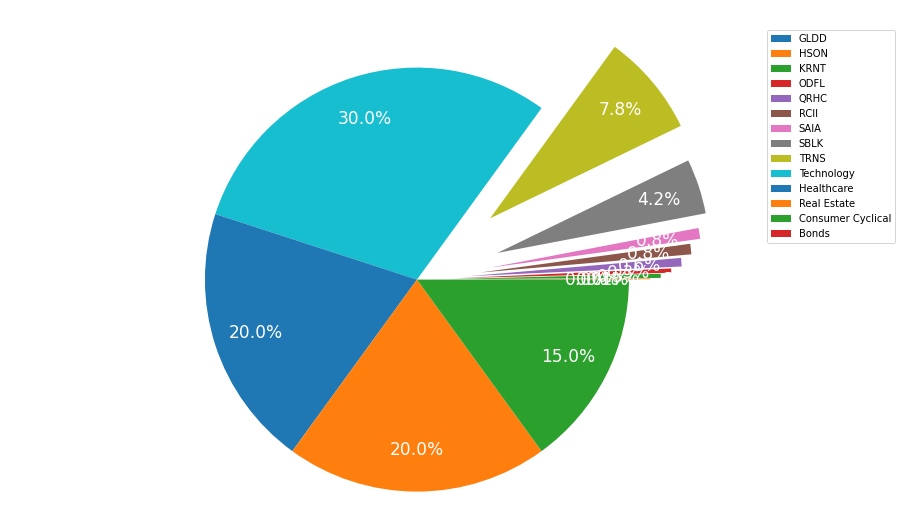

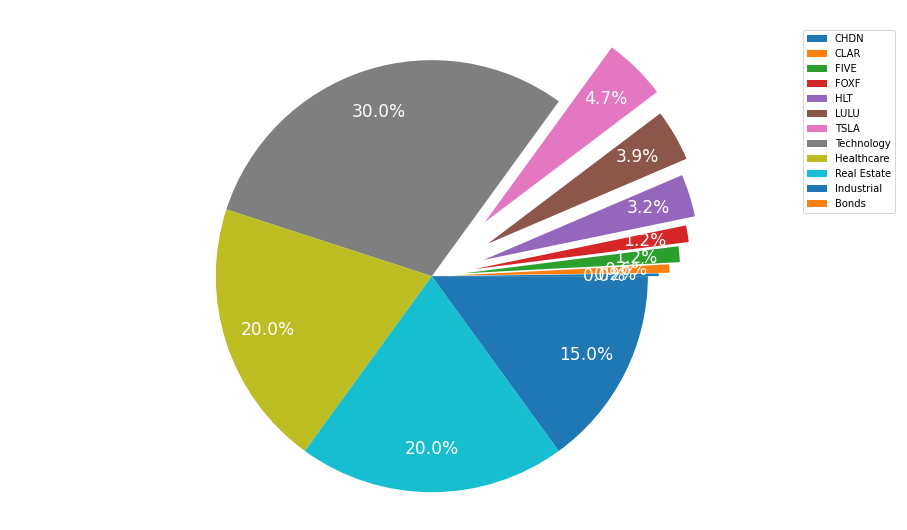

In [30]:
for i, s in enumerate(labels):

    sec_w = sector_full_weights.copy()
    sec_label = all_label.copy()
    
    sec_w.pop(i)
    sec_label.pop(i)

    counts = pd.Series(sector_values[i] + sec_w, 
                    index= sector_tickers[i] + sec_label)

    explode = tuple((0.05 + 0.05*n) for n in range(len(sector_values[i]))) + tuple((0) for n in range(len(sec_w)))

    counts.plot(figsize=(16,9), kind='pie', fontsize=17, explode=explode, textprops={'color':"w"},  autopct='%1.1f%%', pctdistance=0.8)
    plt.axis('equal')
    plt.ylabel('')
    plt.title(s + ' Breakdown',  fontsize=15, color= 'w', fontweight='bold')
    plt.legend(labels=counts.index, loc="best")
    plt.show()